In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('wind turbine life time.xlsx')
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,1977,1978,1979,1980,1981,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,10.0,13.0,18.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,454622.0,345912.5,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9
2,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,454622.0,345912.5,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9
3,90.0,18.0,23.0,1.427740e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,119928.0,97373.0,91831.0,93290.0,98739.0,37100.0,0.0,NaN,NaN,NaN
4,22.0,10.0,18.0,2.504650e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
start_date = np.zeros(df.shape[0])
end_date = np.zeros(df.shape[0])

for i in range(1977,2017):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if start_date[num] == 0:
            start_date[num] = i
            
for i in range(2016,1976,-1):
    years = list(df[i])
    none_zeros = []
    for index,j in enumerate(years):
        if j > 0:
            none_zeros.append(index)
    for num in none_zeros:
        if end_date[num] == 0:
            end_date[num] = i
len(start_date),len(end_date)       

(3306, 3306)

In [4]:
df['Year of start'] = list(start_date)
df['Year of end'] = list(end_date)
df.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,Year of start,Year of end
0,10.0,13.0,18.0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,NaN,NaN,NaN,NaN,NaN,NaN,...,341225.5,388622.0,358744.5,351972.5,247584.5,439209.15,350204.65,6824.9,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,91831.0,93290.0,98739.0,37100.0,0.0,NaN,NaN,NaN,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,2002.0


In [5]:
# Get date of start and end to calculate life time
df_data = df[['Capacity (kW)','Rotor diameter (m)','Hub height (m)','total production','life time','Year of start','Year of end']]
df_data.head()    

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end
0,10.0,13.0,18.0,0.000000e+00,NaN,0.0,0.0
1,300.0,35.0,35.0,1.164174e+07,NaN,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,NaN,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,NaN,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,NaN,1986.0,2002.0


In [6]:
df_data['life time'] = df_data['Year of end']-df_data['Year of start']+1
df_data = df_data.dropna()
drop_list = []
for i in df_data.index:
    if min(list(df_data.loc[i])) < 1 :
        drop_list.append(i)
len(drop_list)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


402

In [7]:
df_data = df_data.drop(index=drop_list)
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end
1,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0
2,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0
3,90.0,18.0,23.0,1.427740e+06,15.0,1998.0,2012.0
4,22.0,10.0,18.0,2.504650e+05,17.0,1986.0,2002.0
5,75.0,17.0,23.0,2.095934e+06,17.0,1986.0,2002.0


In [8]:
load_factor = {}
year = [i for i in range(1985,2017)]
cp_percent = [23.29,27.01,23.98,27.29,27.55,29.31,26.35,26.88,28.15,29.23,27.47,24.34,25.50,28.39,25.01,27.34,23.64,25.24,22.46,25.81,
              25.49,23.37,28.01,26.53,24.09,22.61,27.10,26.33,24.44,25.83,29.16,23.86] # available data
for y,cp in zip(year,cp_percent):
    load_factor[y]=cp
for i in range(1978,1985):
    load_factor[i] = np.mean(cp_percent) # data which is unavailbale, using average values
len(load_factor)

39

In [9]:
production_cp = []
for index in df_data.index:
    start_y = int(df_data.loc[index][5])
    end_y = int(df_data.loc[index][6])
    capacity = df_data.loc[index][0]
    production = 0
    for y in range(start_y,end_y+1):
        production += capacity*8760*load_factor[y]/100
    production_cp.append(production)
len(production_cp)

2903

In [10]:
df_data['Production_cp'] = production_cp
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end,Production_cp
1,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07
2,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07
3,90.0,18.0,23.0,1.427740e+06,15.0,1998.0,2012.0,3.007115e+06
4,22.0,10.0,18.0,2.504650e+05,17.0,1986.0,2002.0,8.724049e+05
5,75.0,17.0,23.0,2.095934e+06,17.0,1986.0,2002.0,2.974108e+06


In [11]:
df_data['Production_cp'].mean()

8522015.030995771

In [12]:
df_data.to_csv('production.csv')

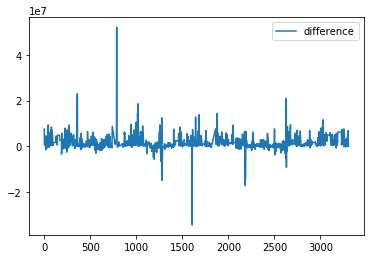

In [13]:
#plt.plot(df_data['total production'],label='from excel')
#plt.plot(df_data['Production_cp'],label='from cp')
plt.plot(df_data['Production_cp']-df_data['total production'],label='difference')
plt.legend()
plt.show()

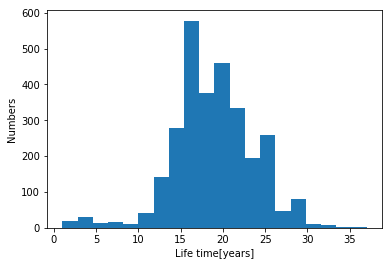

In [14]:
# a general plot to see the distribution of life time
life_time = list(df_data['life time'])

plt.hist(life_time,20)
plt.xlabel('Life time[years]')
plt.ylabel('Numbers')
plt.show()

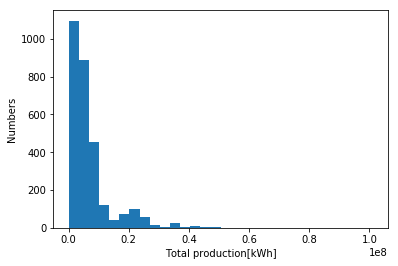

In [15]:
# a general plot to see the distribution of life time production
total_production = list(df_data['total production'])

plt.hist(total_production,30)
plt.xlabel('Total production[kWh]')
plt.ylabel('Numbers')
plt.show()

In [16]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4,5]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [18]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

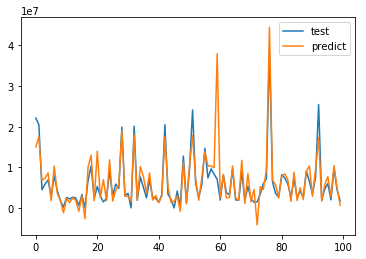

Text(0, 0.5, 'predict')

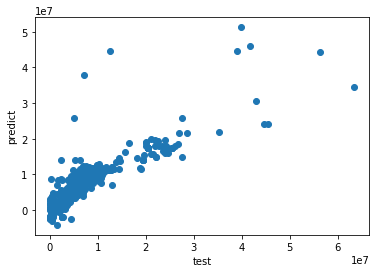

In [19]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [20]:
from sklearn import metrics
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

1982503.4628605412 12383737373678.738 3519053.476956373


In [21]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.7170859699639762, 0.7499231478213837)

In [22]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [23]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

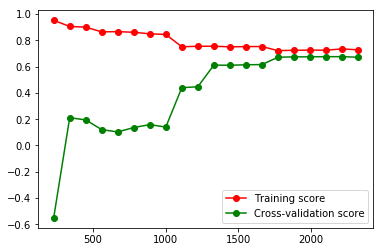

In [24]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [25]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

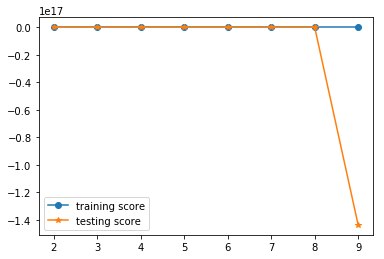

In [26]:
X = df_data.values.copy()
x_p = X[:,[0,1,2,4,5]]
y_p = X[:,[3]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_p)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend()
plt.show() 

In [27]:
train_scores,test_scores

([0.9257203151744802,
  0.9548832778017231,
  0.96615230271261,
  0.9771257720013752,
  0.9787219074846656,
  0.9778862849414287,
  0.9782985033186051,
  0.9787277421223215],
 [0.7909302402064606,
  0.9455792958092976,
  -965.9590659636906,
  -2234.604919127203,
  -2412435944.4105954,
  -8156491.10190657,
  -598579638701.72,
  -1.4372306235191461e+17])

0.9150161837495123 0.7693262905748428


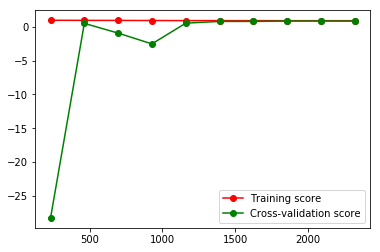

In [78]:
X = df_data.values.copy()
x_p = X[:,[0,1,2,4,5]]
y_p = X[:,[3]]
poly = PolynomialFeatures(2) # 3 and 4 will lead to overfitting, as the cross vildation scores are very bad
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_p)
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)
train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_p, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
print(regr.score(x_train,y_train),regr.score(x_test,y_test))
plt.show()

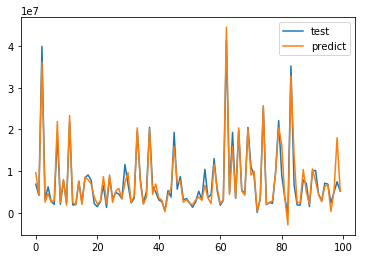

Text(0, 0.5, 'predict')

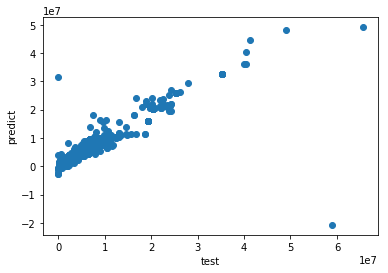

In [79]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [80]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

#X = df_data.values.copy()
#y = X[:,3]
#x = X[:,[0,1,2,4,5]] # using all the features
#x_train, x_test, y_train, y_test = train_test_split(x,y)

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

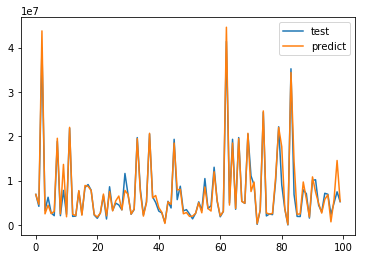

Text(0, 0.5, 'predict')

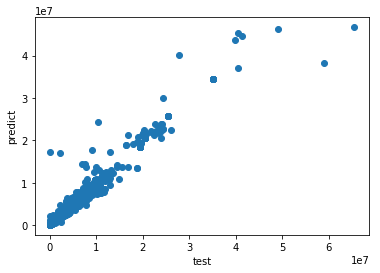

In [81]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [82]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

809504.9600342683 3609224345271.607 1899795.8693690244


In [83]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.9423465243528393, 0.9357758400650253)

In [84]:
actual_value = df_data['total production']
pred_RF = RF_model.predict(x_prime)
pred_cp = df_data['Production_cp']


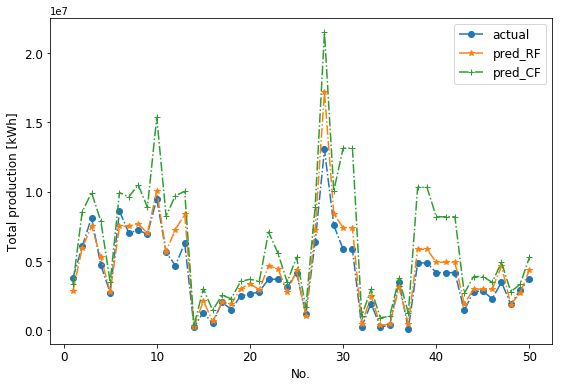

In [85]:
plt.figure(figsize=(9,6))
x_axis = [i for i in range(1,51)]
plt.plot(x_axis,actual_value[50:100],'-.o',label='actual')
plt.plot(x_axis,pred_RF[50:100],'-.*',label='pred_RF')
plt.plot(x_axis,pred_cp[50:100],'-.+',label='pred_CF')
plt.xlabel('No.',fontsize=12)
plt.ylabel('Total production [kWh]',fontsize=12)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('compare_rf_cf.png')
plt.show()

In [86]:
MAE_CP=metrics.mean_absolute_error(actual_value,pred_cp) 
MSE_CP=metrics.mean_squared_error(actual_value,pred_cp)  
RMSE_CP= np.sqrt(metrics.mean_squared_error(actual_value,pred_cp))
print(MAE_CP,MSE_CP,RMSE_CP)

1901035.082816088 10742687860597.916 3277603.9816606757


In [87]:
actual_value.mean(),actual_value.max(),actual_value.min()

(6934353.356136422, 101164434.16100001, 101.0)

In [88]:
pred_RF.mean(),pred_RF.max(),pred_RF.min()

(6956061.502679523, 48109406.09780228, 60382.026919087206)

In [89]:
pred_cp.mean(),pred_cp.max(),pred_cp.min()

(8522015.030995771, 74811276.0, 20901.36)

In [91]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.01)

#X = df_data.values.copy()
#y = X[:,3]
#x = X[:,[0,1,2,4,5]] # using all the features
#x_train, x_test, y_train, y_test = train_test_split(x,y)

In [95]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-4,
            'hidden_layer_sizes': (20,10), 
            'random_state':1,
            'max_iter':200,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,np.ravel(y_train))
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 24078719833797.49218750
Iteration 2, loss = 11777857328760.44531250
Iteration 3, loss = 7495670800772.00390625
Iteration 4, loss = 8022202604782.31347656
Iteration 5, loss = 7058055498195.55957031
Iteration 6, loss = 6485785731700.27832031
Iteration 7, loss = 6308883376551.50585938
Iteration 8, loss = 6375049508964.45312500
Iteration 9, loss = 6307639539772.68164062
Iteration 10, loss = 5863252266199.51855469
Iteration 11, loss = 5710873785734.43359375
Iteration 12, loss = 5974913272681.67480469
Iteration 13, loss = 5875763570003.03222656
Iteration 14, loss = 5582483120100.44238281
Iteration 15, loss = 6277179510794.88183594
Iteration 16, loss = 5770539755848.46093750
Iteration 17, loss = 5640102933474.80273438
Iteration 18, loss = 5713099708724.20312500
Iteration 19, loss = 5861322910988.73730469
Iteration 20, loss = 5484065393595.19140625
Iteration 21, loss = 5390596483706.78906250
Iteration 22, loss = 5397883497342.76464844
Iteration 23, loss = 5525498781991.1406

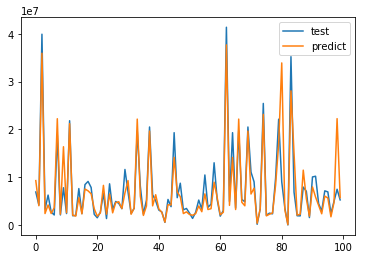

Text(0, 0.5, 'predict')

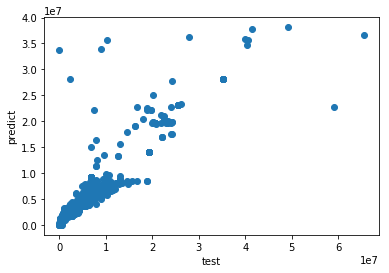

In [96]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [97]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

1567827.309670462 11877745798909.357 3446410.5673743165


In [98]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.839073887947067, 0.7886420535604799)

In [1]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_NN[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.show()

NameError: name 'plt' is not defined

In [47]:
# feature extraction, adding new features

df_data['P_sqrt'] = df_data['Capacity (kW)']**0.5
df_data['P_log'] = np.log(list(df_data['Capacity (kW)']))
df_data['1/P'] = 1/df_data['Capacity (kW)']
df_data['R_sqrt'] = df_data['Rotor diameter (m)']**0.5
df_data['R_log'] = np.log(list(df_data['Rotor diameter (m)']))
df_data['1/R'] = 1/df_data['Rotor diameter (m)']
df_data['R_h'] = df_data['Rotor diameter (m)']/df_data['Hub height (m)']
df_data['exp(R/h)'] = np.exp(df_data['R_h'])
#df_data['P_square'] = df_data['Capacity (kW)']**2
df_data = df_data.dropna()
df_data.head()

,Capacity (kW),Rotor diameter (m),Hub height (m),total production,life time,Year of start,Year of end,Production_cp,P_sqrt,P_log,1/P,R_sqrt,R_log,1/R,R_h,exp(R/h)
1,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07,17.320508,5.703782,0.003333,5.916080,3.555348,0.028571,1.000000,2.718282
2,300.0,35.0,35.0,1.164174e+07,28.0,1989.0,2016.0,1.917100e+07,17.320508,5.703782,0.003333,5.916080,3.555348,0.028571,1.000000,2.718282
3,90.0,18.0,23.0,1.427740e+06,15.0,1998.0,2012.0,3.007115e+06,9.486833,4.499810,0.011111,4.242641,2.890372,0.055556,0.782609,2.187170
4,22.0,10.0,18.0,2.504650e+05,17.0,1986.0,2002.0,8.724049e+05,4.690416,3.091042,0.045455,3.162278,2.302585,0.100000,0.555556,1.742909
5,75.0,17.0,23.0,2.095934e+06,17.0,1986.0,2002.0,2.974108e+06,8.660254,4.317488,0.013333,4.123106,2.833213,0.058824,0.739130,2.094114


In [48]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,1,2,4,5,8,9,10,11,12,13,14,15]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.06632772 0.07696356 0.14407282 0.07292877 0.00940973 0.13785457
 0.19022822 0.03076702 0.08079287 0.04084789 0.04465664 0.05595568
 0.04919449]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,1)# using 1 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [13  6 10 11 12  9  4  3  5  2  1  7  8]


In [50]:
X = df_data.values.copy()
y = X[:,3]
x = X[:,[0,2,9,12,13]] # selecting the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

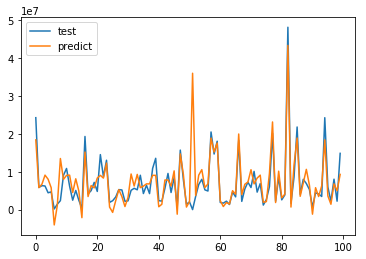

Text(0, 0.5, 'predict')

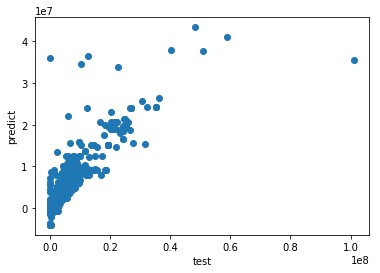

In [51]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [52]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

2219155.006377166 18090689876080.246 4253315.163032273


In [53]:
regr.score(x_train,y_train),regr.score(x_test,y_test)

(0.7669639239948896, 0.7056142612393408)

In [54]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

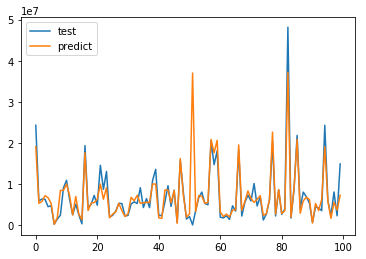

Text(0, 0.5, 'predict')

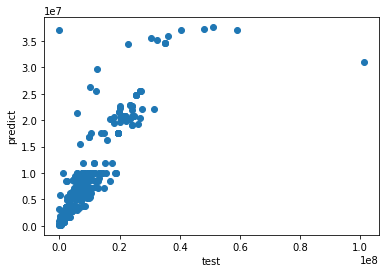

In [55]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [56]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

1505831.0726619042 14771160816008.98 3843326.790166168


In [57]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8828998414062006, 0.7596322130908427)

In [58]:
RF_model.predict([[3450,105,np.log(3450),np.log(113),1/113]])

array([36990451.42509639])

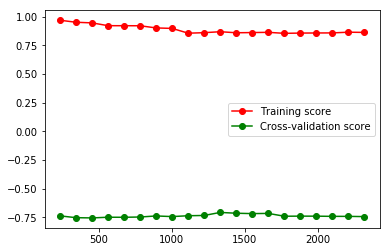

In [59]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [60]:
train_scores_mean

array([0.96879643, 0.9512227 , 0.94577205, 0.92136057, 0.92107748,
       0.92063919, 0.90171426, 0.89758263, 0.85588157, 0.86035881,
       0.86874582, 0.85956289, 0.86135086, 0.86342184, 0.85462427,
       0.85691713, 0.85775598, 0.85838543, 0.86456241, 0.86273848])

In [61]:
test_scores_mean

array([-0.73703962, -0.75287378, -0.75486718, -0.74890353, -0.74930775,
       -0.7469161 , -0.73773599, -0.74328096, -0.73583162, -0.73343773,
       -0.70695848, -0.71400885, -0.71734161, -0.7155081 , -0.74012692,
       -0.73929926, -0.73958592, -0.74130558, -0.74134482, -0.74351667])

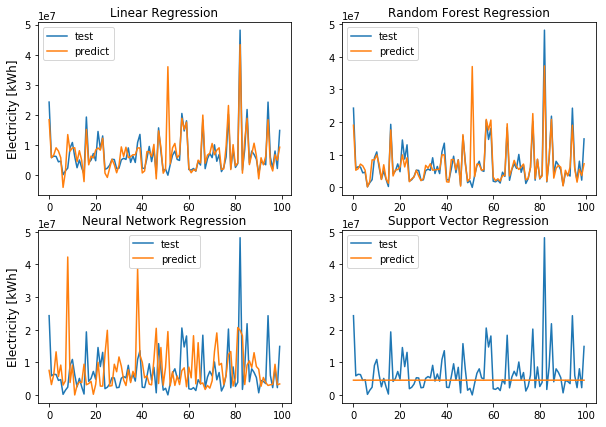

In [62]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.ylabel('Electricity [kWh]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.subplot(224)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.title('Support Vector Regression')

plt.show()

## Summary

To estimate the rotor diameter of a wind turbine, it is possible to just use rated power and the location (On/Offshore).
1.Models like Linear regression, Random Forest, SVR and so on can be used.
2.Feature extraction can be done with polynominal processing or by personal defination.
3.Use test set, learning curve as well as other metrics indexes to evaluate the model's performance.
4.Feature selection can be applied if needed.

In [76]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=150, gamma=0.1, epsilon=.1)

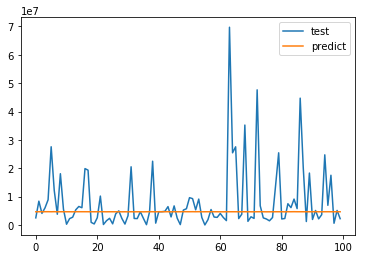

Text(0, 0.5, 'predict')

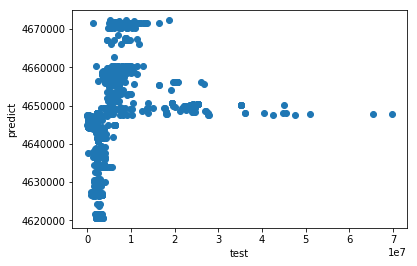

In [77]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [78]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

4665528.610638217 74695937447451.83 8642681.149241352


In [79]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(-0.0847064482938602, -0.09237218659347457)

In [82]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'lbfgs', 
            'activation':'relu',
            'alpha':1e-4,
            'hidden_layer_sizes': (15,10), 
            'random_state':1,
            'max_iter':200,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (20,10)) # number of hidden layers
mlp.fit(x_train,y_train)
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 51820915846460.68750000
Iteration 2, loss = 50821140713213.51562500
Iteration 3, loss = 46749701755375.78125000
Iteration 4, loss = 35353272642923.16406250
Iteration 5, loss = 21468912276907.87890625
Iteration 6, loss = 21019669133053.40234375
Iteration 7, loss = 18678283521212.43359375
Iteration 8, loss = 18116994123114.98828125
Iteration 9, loss = 17574394974145.02929688
Iteration 10, loss = 16946072607675.70117188
Iteration 11, loss = 16388559026296.32031250
Iteration 12, loss = 15866030056011.55664062
Iteration 13, loss = 15193159756777.01171875
Iteration 14, loss = 14821665731607.38281250
Iteration 15, loss = 14156715935322.62890625
Iteration 16, loss = 13829565793767.08593750
Iteration 17, loss = 13482695969333.72851562
Iteration 18, loss = 13432917528001.97070312
Iteration 19, loss = 13459276893796.60351562
Iteration 20, loss = 13245591998179.09570312
Iteration 21, loss = 12871166234170.42187500
Iteration 22, loss = 12875200898828.47460938
Iteration 23, loss 

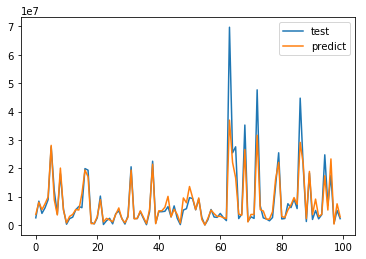

Text(0, 0.5, 'predict')

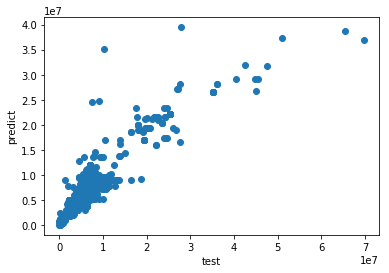

In [83]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [84]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.7695175491110599, 0.8258256050294627)

In [85]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

1925591.496155183 11909969762447.584 3451082.404470746


In [ ]:
# consider multi-output problems